In [1]:
import pandas as pd
import numpy as np
import sqlite3 as db
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# https://www.dataquest.io/blog/python-pandas-databases/

In [2]:
data = r'C:\Users\Abhiram Challapalli\Desktop\Ineuron Projects\ml_healthcare\Data'
df = pd.read_csv(data+"\\X_train_new_perc_cols.csv")
df.head()

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
0,Uttar Pradesh,Etah,45,9054,52944,8662.0,8322.0,2755,5.67,6.70,...,7.17,25.95,29.27,7.33,8.53,865,975,16.360683,15.718495,5.203611
1,Rajasthan,Dungarpur,64,16102,79867,15486.0,14761.0,3044,4.70,5.20,...,5.80,26.10,28.60,6.20,6.90,856,945,19.389735,18.481976,3.811336
2,Rajasthan,Kota,68,9148,43845,8790.0,8320.0,1534,4.80,4.60,...,5.20,20.30,22.90,5.00,6.10,814,943,20.047896,18.975938,3.498689
3,Chhattisgarh,Koriya,61,11402,48871,10148.0,9432.0,2153,4.45,4.09,...,6.08,19.51,21.70,5.85,6.98,820,950,20.764871,19.299789,4.405476
4,Madhya Pradesh,Jabalpur,99,17703,77369,14957.0,14245.0,2180,4.30,4.40,...,5.10,20.30,22.50,5.30,6.20,777,867,19.332032,18.411767,2.817666


In [3]:
df.columns

Index(['State', 'State / District Name',
       'SAMPLE PARTICULARS - Sample Units - Total',
       'SAMPLE PARTICULARS - Households - Total',
       'SAMPLE PARTICULARS - Population - Total',
       'SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total',
       'SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total',
       'SAMPLE PARTICULARS - Children 12-23 months - Total',
       'HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total',
       'HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total',
       ...
       'AWARENESS ON HIV/AIDS, RTI/STI, HAF/ORS/ORT/ZINC AND ARI/PNEUMONIA - Women who are aware of danger signs of ARI/Pneumonia (%) - Total',
       'MORTALITY - Crude Death Rate (CDR) - Total - Person',
       'MORTALITY - Crude Death Rate (CDR) - Total - Male',
       'MORTALITY - Crude Death Rate (CDR) - Total - Female',
       'CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower L

In [185]:
df.isnull().sum()

State                                                                                                 0
State / District Name                                                                                 0
SAMPLE PARTICULARS - Sample Units - Total                                                             0
SAMPLE PARTICULARS - Households - Total                                                               0
SAMPLE PARTICULARS - Population - Total                                                               0
                                                                                                     ..
CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit      0
CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit      0
CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit      0
CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ra

In [4]:
def search_for_columns(search_parameter):
    for i in df.columns:
        if s
        earch_parameter in i.lower():
            print(i)

In [5]:
search_for_columns('mar')

SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total
SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total
HOUSEHOLD CHARACTERISTICS - Currently Married Illiterate Women aged 15-49 years (%) - Total
MARRIAGE - Marriages among Females below legal age (18 years) (%)# - Total
MARRIAGE - Marriages among Males below legal age (21 years) (%)# - Total
MARRIAGE - Currently Married Women aged 20-24 years married before legal age (18 years) (%) - Total
MARRIAGE - Currently Married Men aged 25-29 years married before legal age (21 years) (%) - Total
MARRIAGE - Mean age at Marriage# - Male - Total
MARRIAGE - Mean age at Marriage# - Female - Total
ANTE NATAL CARE - Currently Married Pregnant Women aged 15-49 years registered for ANC (%) - Total
SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%)
SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%)


##  Ever Married Women (aged 15-49 years) 

In [3]:
ever_married = df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total']
ever_married.describe()

count      227.000000
mean     14062.339207
std       7268.165705
min       2501.000000
25%       9438.000000
50%      12568.000000
75%      16270.000000
max      56581.000000
Name: SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total, dtype: float64

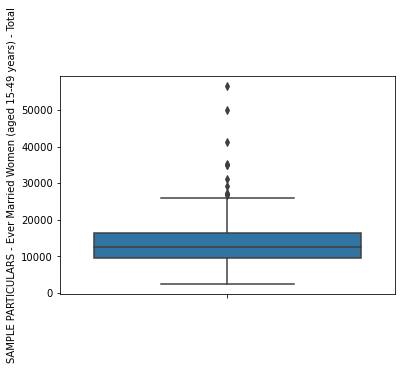

In [4]:
sns.boxplot(y=ever_married)

In [8]:
ever_married_mean = ever_married.mean()
ever_married_SD = ever_married.std()

ever_married_mean, ever_married_SD

(14062.339207048459, 7268.165705369729)

In [5]:
outliers = []

def detect_outliers(data_):
    threshold = 3 #3 standard deviations away from the mean
    
    mean_1 = np.mean(data_)
    std_1 = np.std(data_)
    
    for i in data_:
        z_score = (i-mean_1)/std_1
        
        if np.abs(z_score>3):
            outliers.append(i)
            

    outliers_df = pd.DataFrame([])
    for i in outliers:
        outliers_df = outliers_df.append(pd.DataFrame(df.loc[data_ == i]))

    return outliers_df


In [207]:
def detect_outliers_iqr(data_, frame=df):
    
    sorted(data_)

    q1, q3= np.percentile(data_,[25,75])
    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    
    iqr_outliers = frame.loc[(data_ < lower_bound) | (data_ > upper_bound)]

    return iqr_outliers


In [278]:
def fix_outliers_with_mean(data_):
    
    sorted(data_)

    q1, q3= np.percentile(data_,[25,75])
    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    mean_score = np.mean(data_)
    print(mean_score)
    
    for i in range(len(data_)):
        if (data_[i] < lower_bound) | (data_[i] > upper_bound):
            data_[i] = mean_score           
        

    return data_


def fix_outliers_with_mean_all_columns(df):
    clean_df = pd.DataFrame()
    columns = df.drop(['State','State / District Name'], axis=1).columns
    
    for column in columns:
        column_data = df[column]
                
        q1, q3= np.percentile(column_data,[25,75])
        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr) 
        mean_score = np.mean(column_data)
        print(mean_score)
        
        for i in range(len(column_data)):
            if (column_data[i] < lower_bound) | (column_data[i] > upper_bound):
                column_data[i] = mean_score
        clean_df[column] = column_data
        
    return clean_df


In [284]:
fix_outliers_with_mean(df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%)'])

12487.3560147655


0      12487.356015
1      12487.356015
2      12487.356015
3      12487.356015
4      12487.356015
           ...     
222    12487.356015
223    12487.356015
224    12487.356015
225    12487.356015
226    12487.356015
Name: SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%), Length: 227, dtype: float64

In [283]:
df.describe()

,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - All - Total,HOUSEHOLD CHARACTERISTICS - Population below age 15 years (%) - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
count,227.0,227.000000,227.000000,227.000000,227.000000,227.000000,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,...,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,227.0,227.0,2.270000e+02,2.270000e+02,2.270000e+02
mean,12686.0,12733.607930,12685.991189,12300.947106,11847.363099,3502.193833,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,...,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,12487.0,12487.0,1.248736e+04,1.248736e+04,1.248736e+04
std,0.0,3910.093483,0.093657,4014.995241,3986.372991,1288.450430,3.646019e-11,3.646019e-11,3.646019e-11,3.646019e-11,...,3.646019e-11,3.646019e-11,3.646019e-11,3.646019e-11,3.646019e-11,0.0,0.0,3.646019e-11,3.646019e-11,3.646019e-11
min,12686.0,2802.000000,12685.000000,2501.000000,2267.000000,1702.000000,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,...,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,12487.0,12487.0,1.248736e+04,1.248736e+04,1.248736e+04
25%,12686.0,10081.500000,12686.000000,9438.000000,8897.000000,2444.500000,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,...,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,12487.0,12487.0,1.248736e+04,1.248736e+04,1.248736e+04
50%,12686.0,12686.000000,12686.000000,12487.356015,11977.000000,3289.000000,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,...,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,12487.0,12487.0,1.248736e+04,1.248736e+04,1.248736e+04
75%,12686.0,15394.500000,12686.000000,14599.500000,14149.000000,5009.000000,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,...,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,12487.0,12487.0,1.248736e+04,1.248736e+04,1.248736e+04
max,12686.0,22342.000000,12686.000000,22161.000000,21536.000000,7514.000000,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,...,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,1.248736e+04,12487.0,12487.0,1.248736e+04,1.248736e+04,1.248736e+04


In [279]:
fix_outliers_with_mean_all_columns(df)

12686.0
12733.607929515418
12685.991189427314
12300.947105791003
11847.36309874831
3502.193832599119
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655


<ipython-input-278-5a959a081387>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_data[i] = mean_score


12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
6704.101773262846
4929.330189701145
9104.400349691901
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.356014695297
12487.3560147655
12438.432106265585
9400.506541510058
12487.291179691454
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
12487.3560147655
1248

,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - All - Total,HOUSEHOLD CHARACTERISTICS - Population below age 15 years (%) - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
0,12686,9054,12686,8662.000000,8322.000000,2755,12487.356015,12487.356015,12487.356015,12487.356015,...,12487.356015,12487.356015,12487.356015,12487.356015,12487.356015,12487,12487,12487.356015,12487.356015,12487.356015
1,12686,16102,12686,15486.000000,14761.000000,3044,12487.356015,12487.356015,12487.356015,12487.356015,...,12487.356015,12487.356015,12487.356015,12487.356015,12487.356015,12487,12487,12487.356015,12487.356015,12487.356015
2,12686,9148,12686,8790.000000,8320.000000,5009,12487.356015,12487.356015,12487.356015,12487.356015,...,12487.356015,12487.356015,12487.356015,12487.356015,12487.356015,12487,12487,12487.356015,12487.356015,12487.356015
3,12686,11402,12686,10148.000000,9432.000000,2153,12487.356015,12487.356015,12487.356015,12487.356015,...,12487.356015,12487.356015,12487.356015,12487.356015,12487.356015,12487,12487,12487.356015,12487.356015,12487.356015
4,12686,17703,12686,14957.000000,14245.000000,2180,12487.356015,12487.356015,12487.356015,12487.356015,...,12487.356015,12487.356015,12487.356015,12487.356015,12487.356015,12487,12487,12487.356015,12487.356015,12487.356015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,12686,11563,12686,11068.000000,10603.000000,2954,12487.356015,12487.356015,12487.356015,12487.356015,...,12487.356015,12487.356015,12487.356015,12487.356015,12487.356015,12487,12487,12487.356015,12487.356015,12487.356015
223,12686,12812,12686,12757.000000,12333.000000,3319,12487.356015,12487.356015,12487.356015,12487.356015,...,12487.356015,12487.356015,12487.356015,12487.356015,12487.356015,12487,12487,12487.356015,12487.356015,12487.356015
224,12686,19317,12686,15535.000000,14406.000000,2881,12487.356015,12487.356015,12487.356015,12487.356015,...,12487.356015,12487.356015,12487.356015,12487.356015,12487.356015,12487,12487,12487.356015,12487.356015,12487.356015
225,12686,10675,12686,9458.000000,9107.000000,2063,12487.356015,12487.356015,12487.356015,12487.356015,...,12487.356015,12487.356015,12487.356015,12487.356015,12487.356015,12487,12487,12487.356015,12487.356015,12487.356015


In [242]:
detect_outliers_iqr(df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total'])

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
145,Jharkhand,Ranchi,137,26129,133247,24887.0,23089.0,5203,4.80,5.00,...,5.50,21.90,23.60,5.8,6.70,869,945,18.677344,17.327970,3.904778
173,Madhya Pradesh,Indore,107,24253,120277,24765.0,23557.0,3841,5.00,4.80,...,4.50,17.90,21.10,4.6,5.80,830,914,20.589971,19.585623,3.193462
176,Chhattisgarh,Durg,119,25646,120957,24660.0,23077.0,4328,4.49,4.69,...,5.78,19.52,21.14,5.8,6.55,951,1043,20.387410,19.078681,3.578131
191,Bihar,Siwan,101,25888,148425,24853.0,24313.0,4584,5.60,5.80,...,6.80,24.60,26.40,6.9,7.70,914,985,16.744484,16.380664,3.088428


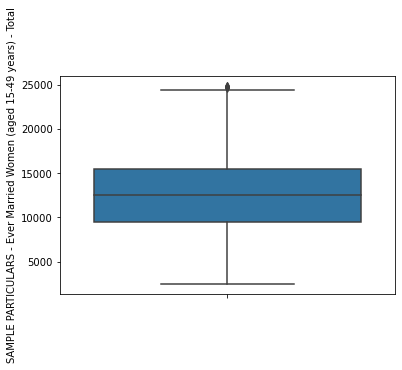

In [236]:
sns.boxplot(y = df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total'])

In [244]:
fix_outliers_with_mean(df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total'])

12896.583854966235


<ipython-input-243-b5bdf6250f38>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_[i] = mean_score


0       8662.0
1      15486.0
2       8790.0
3      10148.0
4      14957.0
        ...   
222    11068.0
223    12757.0
224    15535.0
225     9458.0
226    23414.0
Name: SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total, Length: 227, dtype: float64

In [233]:
fixed_data = fix_outliers_with_mean(df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total'])

13007.901899901028


<ipython-input-231-839576e79064>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_[i] = mean_score


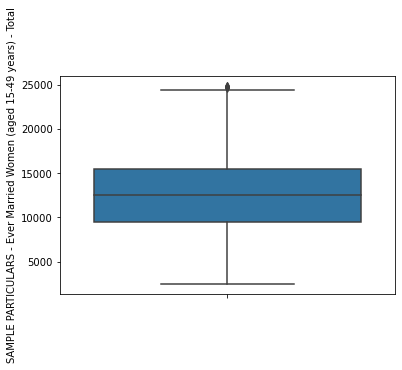

In [234]:
sns.boxplot(y=fixed_data)

In [11]:
detect_outliers_iqr(df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total'], df)

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
40,Jharkhand,Sahibganj,271,51689,261780,49915.0,46814.0,11814,4.90,4.60,...,6.20,23.00,24.10,6.30,6.70,909,964,19.067538,17.882955,4.512950
60,Bihar,Patna,128,26624,141204,26935.0,25872.0,5352,5.10,4.80,...,4.90,20.10,22.20,4.30,5.10,885,960,19.075239,18.322427,3.790261
63,Jharkhand,Purbi Singhbhum,279,37470,174472,35135.0,32951.0,5993,4.60,4.60,...,4.80,19.60,20.70,5.20,5.70,848,917,20.137902,18.886125,3.434935
66,Assam,Sonitpur,138,30255,143695,27274.0,25213.0,4724,4.60,4.90,...,5.90,17.90,19.90,5.90,6.90,916,1000,18.980479,17.546192,3.287519
69,Uttarakhand,Chamoli,276,37152,161113,31160.0,29509.0,6145,4.70,3.90,...,4.04,17.62,18.62,5.46,5.89,824,899,19.340463,18.315716,3.814093
81,Jharkhand,Gumla,154,33467,166488,29190.0,26940.0,7514,4.80,5.00,...,7.80,24.50,25.80,8.60,9.30,912,978,17.532795,16.181346,4.513238
89,Uttarakhand,Pauri Garhwal,386,50397,213084,41250.0,39122.0,6844,4.75,4.52,...,6.34,18.26,19.33,7.63,8.23,847,912,19.358563,18.359896,3.211879
108,Odisha,Jharsuguda,213,41734,175022,34890.0,32360.0,5732,4.11,4.23,...,7.30,16.50,17.40,7.70,8.30,869,946,19.934637,18.489104,3.275017
151,Assam,Jorhat,163,39114,172958,34941.0,32640.0,5966,4.40,5.20,...,7.10,18.70,19.90,7.60,8.30,943,1020,20.202014,18.871634,3.449392
196,Uttarakhand,Dehradun,367,66535,303009,56581.0,54234.0,10262,4.86,5.69,...,5.54,15.91,17.26,6.26,6.72,857,916,18.673043,17.898478,3.386698


In [12]:
ever_married_outliers = detect_outliers(df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total'])
ever_married_outliers

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
40,Jharkhand,Sahibganj,271,51689,261780,49915.0,46814.0,11814,4.90,4.60,...,6.20,23.00,24.10,6.30,6.70,909,964,19.067538,17.882955,4.512950
89,Uttarakhand,Pauri Garhwal,386,50397,213084,41250.0,39122.0,6844,4.75,4.52,...,6.34,18.26,19.33,7.63,8.23,847,912,19.358563,18.359896,3.211879
196,Uttarakhand,Dehradun,367,66535,303009,56581.0,54234.0,10262,4.86,5.69,...,5.54,15.91,17.26,6.26,6.72,857,916,18.673043,17.898478,3.386698


In [13]:
detect_outliers_iqr(df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total'], df)

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
40,Jharkhand,Sahibganj,271,51689,261780,49915.0,46814.0,11814,4.90,4.60,...,6.20,23.00,24.10,6.30,6.70,909,964,19.067538,17.882955,4.512950
60,Bihar,Patna,128,26624,141204,26935.0,25872.0,5352,5.10,4.80,...,4.90,20.10,22.20,4.30,5.10,885,960,19.075239,18.322427,3.790261
63,Jharkhand,Purbi Singhbhum,279,37470,174472,35135.0,32951.0,5993,4.60,4.60,...,4.80,19.60,20.70,5.20,5.70,848,917,20.137902,18.886125,3.434935
66,Assam,Sonitpur,138,30255,143695,27274.0,25213.0,4724,4.60,4.90,...,5.90,17.90,19.90,5.90,6.90,916,1000,18.980479,17.546192,3.287519
69,Uttarakhand,Chamoli,276,37152,161113,31160.0,29509.0,6145,4.70,3.90,...,4.04,17.62,18.62,5.46,5.89,824,899,19.340463,18.315716,3.814093
81,Jharkhand,Gumla,154,33467,166488,29190.0,26940.0,7514,4.80,5.00,...,7.80,24.50,25.80,8.60,9.30,912,978,17.532795,16.181346,4.513238
89,Uttarakhand,Pauri Garhwal,386,50397,213084,41250.0,39122.0,6844,4.75,4.52,...,6.34,18.26,19.33,7.63,8.23,847,912,19.358563,18.359896,3.211879
108,Odisha,Jharsuguda,213,41734,175022,34890.0,32360.0,5732,4.11,4.23,...,7.30,16.50,17.40,7.70,8.30,869,946,19.934637,18.489104,3.275017
151,Assam,Jorhat,163,39114,172958,34941.0,32640.0,5966,4.40,5.20,...,7.10,18.70,19.90,7.60,8.30,943,1020,20.202014,18.871634,3.449392
196,Uttarakhand,Dehradun,367,66535,303009,56581.0,54234.0,10262,4.86,5.69,...,5.54,15.91,17.26,6.26,6.72,857,916,18.673043,17.898478,3.386698


In [13]:
total_states = df['State'].unique()
total_columns = df.columns

total_columns = total_columns.drop(['State', 'State / District Name'])

In [7]:
def population_percentage(feature):
    
    population_calc = {}
    
    for state in total_states:
        
        total_population = df.loc[df['State'] == state]['SAMPLE PARTICULARS - Population - Total'].sum()
        target = df.loc[df['State'] == state][feature].sum()    
        calculated = target/total_population
        
        population_calc[state] = round(calculated*100, 2)
        
    result = pd.DataFrame([population_calc])
    
    return result

In [16]:
population_percentage('SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total')

,Uttar Pradesh,Rajasthan,Chhattisgarh,Madhya Pradesh,Bihar,Odisha,Assam,Uttarakhand,Jharkhand
0,17.43,19.75,19.98,19.75,18.4,20.19,19.35,19.03,19.0


In [ ]:
### we were able to identify the outliers using z-score(7 total) and Inter-Quartile Range(13 total).

## Currently Married Women (aged 15-49 years) - Total

In [15]:
search_for_columns('mar')

SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total
SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total
HOUSEHOLD CHARACTERISTICS - Currently Married Illiterate Women aged 15-49 years (%) - Total
MARRIAGE - Marriages among Females below legal age (18 years) (%)# - Total
MARRIAGE - Marriages among Males below legal age (21 years) (%)# - Total
MARRIAGE - Currently Married Women aged 20-24 years married before legal age (18 years) (%) - Total
MARRIAGE - Currently Married Men aged 25-29 years married before legal age (21 years) (%) - Total
MARRIAGE - Mean age at Marriage# - Male - Total
MARRIAGE - Mean age at Marriage# - Female - Total
ANTE NATAL CARE - Currently Married Pregnant Women aged 15-49 years registered for ANC (%) - Total


In [18]:
df[['SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total', 'State']]

,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,State
0,8322.0,Uttar Pradesh
1,14761.0,Rajasthan
2,8320.0,Rajasthan
3,9432.0,Chhattisgarh
4,14245.0,Madhya Pradesh
...,...,...
222,10603.0,Uttar Pradesh
223,12333.0,Uttar Pradesh
224,14406.0,Chhattisgarh
225,9107.0,Uttar Pradesh


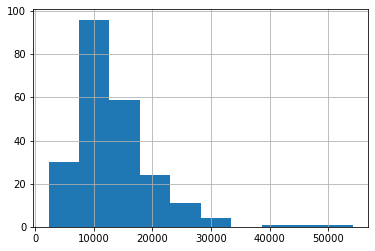

In [19]:
df['SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total'].hist()

In [ ]:
# It is clear that there are Outliers in the column. But, it seams that for most of the states currently married women is less
# than 100000.

#But, it is also possible that this might depend on the total population of the states as well. higher the population, there is 
# a greater chance that the state might contain more married women

# Let's explore further

In [20]:
df['SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total'].max(), df['SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total'].min()

(54234.0, 2267.0)

In [22]:
df.loc[df['SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total'] == 54234.0]

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
196,Uttarakhand,Dehradun,367,66535,303009,56581.0,54234.0,10262,4.86,5.69,...,5.54,15.91,17.26,6.26,6.72,857,916,18.673043,17.898478,3.386698


In [20]:
df.loc[df['SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total'] == 2267.0]

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,"AWARENESS ON HIV/AIDS, RTI/STI, HAF/ORS/ORT/ZINC AND ARI/PNEUMONIA - Women who are aware of danger signs of ARI/Pneumonia (%) - Total",MORTALITY - Crude Death Rate (CDR) - Total - Person,MORTALITY - Crude Death Rate (CDR) - Total - Male,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit
162,Assam,Hailakandi,10.0,2802.0,13892.0,2501.0,2267.0,660.0,4.7,4.8,...,98.1,6.8,7.6,6.0,26.6,34.7,5.7,7.9,735.0,918.0


In [23]:
population_percentage('SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total')

,Uttar Pradesh,Rajasthan,Chhattisgarh,Madhya Pradesh,Bihar,Odisha,Assam,Uttarakhand,Jharkhand
0,16.78,18.96,18.54,18.9,17.9,19.0,17.98,18.05,17.94


In [ ]:
## Here we can see the population vs married women ration. Even Bihar has the ranks 1st in currently married women, when you
# take the populations into account it's at 17.93. Second least.

In [24]:
detect_outliers(df['SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total'])

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
40,Jharkhand,Sahibganj,271,51689,261780,49915.0,46814.0,11814,4.90,4.60,...,6.20,23.00,24.10,6.30,6.70,909,964,19.067538,17.882955,4.512950
89,Uttarakhand,Pauri Garhwal,386,50397,213084,41250.0,39122.0,6844,4.75,4.52,...,6.34,18.26,19.33,7.63,8.23,847,912,19.358563,18.359896,3.211879
196,Uttarakhand,Dehradun,367,66535,303009,56581.0,54234.0,10262,4.86,5.69,...,5.54,15.91,17.26,6.26,6.72,857,916,18.673043,17.898478,3.386698


In [25]:
detect_outliers_iqr(df['SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total'], df)

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
40,Jharkhand,Sahibganj,271,51689,261780,49915.0,46814.0,11814,4.90,4.60,...,6.20,23.00,24.10,6.30,6.70,909,964,19.067538,17.882955,4.512950
63,Jharkhand,Purbi Singhbhum,279,37470,174472,35135.0,32951.0,5993,4.60,4.60,...,4.80,19.60,20.70,5.20,5.70,848,917,20.137902,18.886125,3.434935
69,Uttarakhand,Chamoli,276,37152,161113,31160.0,29509.0,6145,4.70,3.90,...,4.04,17.62,18.62,5.46,5.89,824,899,19.340463,18.315716,3.814093
81,Jharkhand,Gumla,154,33467,166488,29190.0,26940.0,7514,4.80,5.00,...,7.80,24.50,25.80,8.60,9.30,912,978,17.532795,16.181346,4.513238
89,Uttarakhand,Pauri Garhwal,386,50397,213084,41250.0,39122.0,6844,4.75,4.52,...,6.34,18.26,19.33,7.63,8.23,847,912,19.358563,18.359896,3.211879
108,Odisha,Jharsuguda,213,41734,175022,34890.0,32360.0,5732,4.11,4.23,...,7.30,16.50,17.40,7.70,8.30,869,946,19.934637,18.489104,3.275017
151,Assam,Jorhat,163,39114,172958,34941.0,32640.0,5966,4.40,5.20,...,7.10,18.70,19.90,7.60,8.30,943,1020,20.202014,18.871634,3.449392
196,Uttarakhand,Dehradun,367,66535,303009,56581.0,54234.0,10262,4.86,5.69,...,5.54,15.91,17.26,6.26,6.72,857,916,18.673043,17.898478,3.386698


## SAMPLE PARTICULARS - Children 12-23 months - Total

In [26]:
search_for_columns('children 12') #SAMPLE PARTICULARS - Children 12-23 months - Total

SAMPLE PARTICULARS - Children 12-23 months - Total
SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)


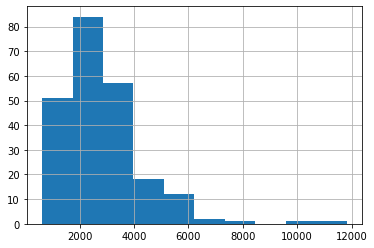

In [27]:
df['SAMPLE PARTICULARS - Children 12-23 months - Total'].hist()

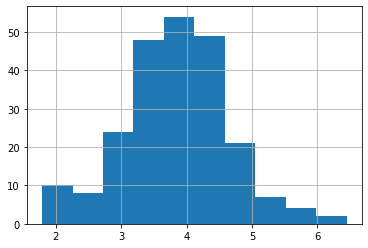

In [28]:
df['SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)'].hist()

In [29]:
detect_outliers_iqr(df['SAMPLE PARTICULARS - Children 12-23 months - Total'], df)

,State,State / District Name,SAMPLE PARTICULARS - Sample Units - Total,SAMPLE PARTICULARS - Households - Total,SAMPLE PARTICULARS - Population - Total,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,SAMPLE PARTICULARS - Children 12-23 months - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - SC - Total,HOUSEHOLD CHARACTERISTICS - Average Household Size - ST - Total,...,MORTALITY - Crude Death Rate (CDR) - Total - Female,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Death Rate - Total - Upper Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Lower Limit,CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Sex Ratio at Birth - Total - Upper Limit,SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),SAMPLE PARTICULARS - Children 12-23 months - Total_population(%)
40,Jharkhand,Sahibganj,271,51689,261780,49915.0,46814.0,11814,4.90,4.60,...,6.20,23.00,24.10,6.30,6.70,909,964,19.067538,17.882955,4.512950
63,Jharkhand,Purbi Singhbhum,279,37470,174472,35135.0,32951.0,5993,4.60,4.60,...,4.80,19.60,20.70,5.20,5.70,848,917,20.137902,18.886125,3.434935
69,Uttarakhand,Chamoli,276,37152,161113,31160.0,29509.0,6145,4.70,3.90,...,4.04,17.62,18.62,5.46,5.89,824,899,19.340463,18.315716,3.814093
81,Jharkhand,Gumla,154,33467,166488,29190.0,26940.0,7514,4.80,5.00,...,7.80,24.50,25.80,8.60,9.30,912,978,17.532795,16.181346,4.513238
89,Uttarakhand,Pauri Garhwal,386,50397,213084,41250.0,39122.0,6844,4.75,4.52,...,6.34,18.26,19.33,7.63,8.23,847,912,19.358563,18.359896,3.211879
114,Uttar Pradesh,Bahraich,76,22906,121402,21397.0,20672.0,6887,4.87,4.46,...,7.85,30.90,33.06,7.48,8.37,928,1001,17.624916,17.027726,5.672888
151,Assam,Jorhat,163,39114,172958,34941.0,32640.0,5966,4.40,5.20,...,7.10,18.70,19.90,7.60,8.30,943,1020,20.202014,18.871634,3.449392
196,Uttarakhand,Dehradun,367,66535,303009,56581.0,54234.0,10262,4.86,5.69,...,5.54,15.91,17.26,6.26,6.72,857,916,18.673043,17.898478,3.386698


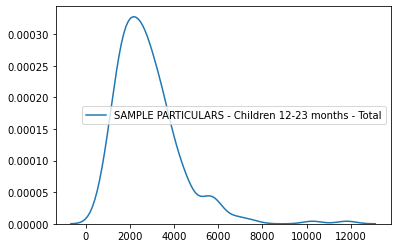

In [30]:
sns.kdeplot(df['SAMPLE PARTICULARS - Children 12-23 months - Total'])

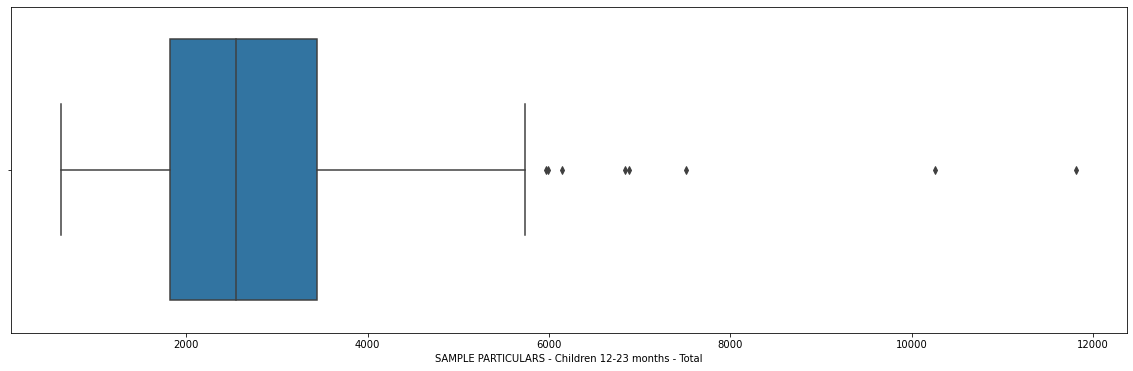

In [31]:
plt.figure(figsize=(20,6))
sns.boxplot(df['SAMPLE PARTICULARS - Children 12-23 months - Total'])
plt.show()

In [32]:
population_percentage('SAMPLE PARTICULARS - Children 12-23 months - Total')

,Uttar Pradesh,Rajasthan,Chhattisgarh,Madhya Pradesh,Bihar,Odisha,Assam,Uttarakhand,Jharkhand
0,4.25,3.2,3.52,3.8,4.03,3.09,3.73,3.36,3.96


In [ ]:
## Outliers per state

In [8]:
def outliers_total():
    outlier_index = {}    

    for states in total_states:
        count = 0        
        for column in total_columns:
            state = df.loc[df['State'] == states]
            size = len(detect_outliers_iqr(state[column], state))
            count = count + size
        outlier_index[states] = count
        
    return outlier_index

In [14]:
outliers_total()

{'Uttar Pradesh': 212,
 'Rajasthan': 96,
 'Chhattisgarh': 63,
 'Madhya Pradesh': 130,
 'Bihar': 88,
 'Odisha': 113,
 'Assam': 98,
 'Uttarakhand': 70,
 'Jharkhand': 63}

In [10]:
mp = df.loc[df['State'] == 'Madhya Pradesh']
mp.size

5049

In [15]:
def test():
    test_index = {}
    count = 0    
    
    for column in total_columns:
        size = len(detect_outliers_iqr(mp[column], mp))
        count += size
    test_index['MP'] = count
    
    return test_index

In [16]:
test()

{'MP': 130}

## EDA for CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Person - Total

In [17]:
for i in df.columns:
    if 'diab' in i.lower():
        print(i)
    

In [18]:
y_train = pd.read_csv(data+"\\y_train.csv")
x = df.drop(['State', 'State / District Name'], axis=1)

In [19]:
y_diabetes = y_train['CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Person - Total']

In [20]:
y_diabetes.shape, df['MORTALITY - Crude Death Rate (CDR) - Total - Person'].shape

((227,), (227,))

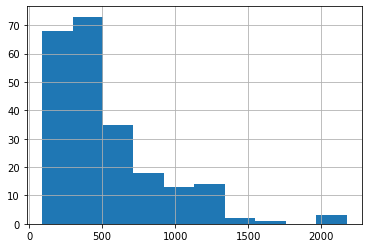

In [21]:
y_diabetes.hist()

In [22]:
def scatter_plot_def(x,y, title="null", x_name='null'):
    plt.figure(figsize=(15,8))
    plt.scatter(x,y)
    plt.title(title)
    plt.xlabel(x_name)
    plt.ylabel("Diabetes")

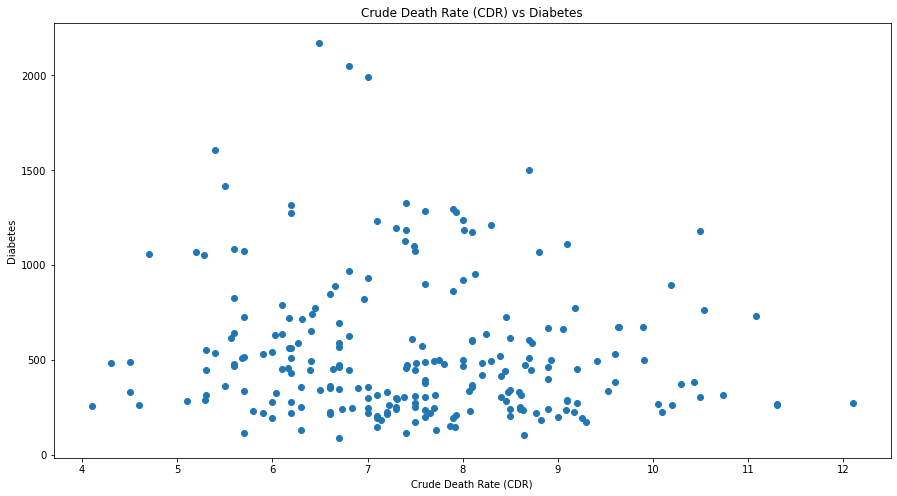

In [45]:
scatter_plot_def(df['MORTALITY - Crude Death Rate (CDR) - Total - Person'], y_diabetes, title="Crude Death Rate (CDR) vs Diabetes", 
                 x_name= 'Crude Death Rate (CDR)')

In [23]:
frames = [x,y_diabetes]
new_df = pd.concat(frames, axis=1)

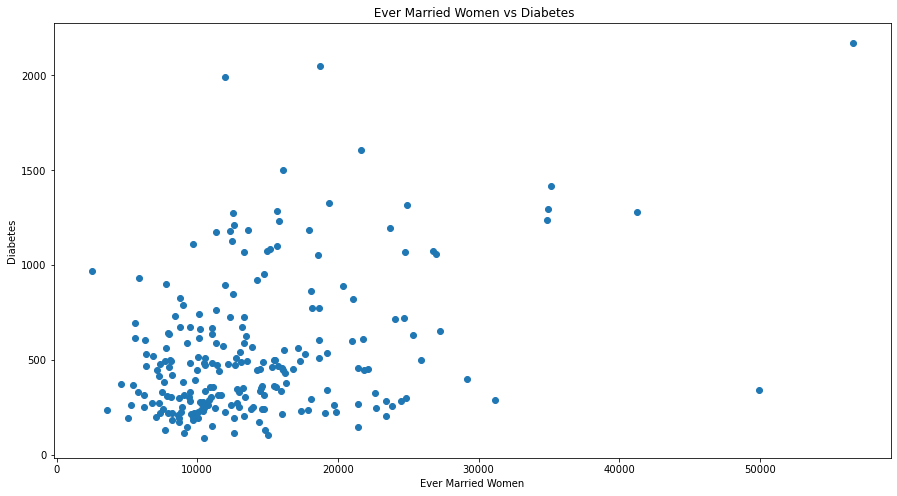

In [47]:
scatter_plot_def(new_df['SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total'], y_diabetes, 
                 title=' Ever Married Women vs Diabetes', x_name='Ever Married Women')

In [285]:
corr_matrix = new_df.corr()
corr_data = pd.DataFrame(corr_matrix['CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Person - Total'].sort_values(ascending=False))

In [286]:
corr_data.rename(columns={'CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Person - Total': 'corr'}, inplace=True)

In [287]:
selected_features = corr_data.loc[corr_data['corr'] > 0.50]
selected_features

,corr
"CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Person - Total",1.000000
MARRIAGE - Mean age at Marriage# - Male - Total,0.651407
MARRIAGE - Mean age at Marriage# - Female - Total,0.606316
FERTILITY - Median age at first live birth of Women aged 15-49 years - Total,0.586444
FERTILITY - Median age at first live birth of Women aged 25-49 years - Total,0.565221
EFFECTIVE LITERACY RATE - Female - Total,0.563973
FERTILITY - Women with two children wanting no more children (%) - Total,0.541013
EFFECTIVE LITERACY RATE - Person - Total,0.537140
DELIVERY CARE - Caesarean out of total delivery taken place in Government Institutions (%) - Total,0.528628
FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEARS) - Current Usage - Withdrawal (%) - Total,0.504273


In [ ]:
from pandas.plotting import scatter_matrix 

plt.figure(figsize=(16,12))
scatter_matrix(new_df[selected_features.index])
plt.xticks(rotation=90)
plt.yticks(rotation=45)

plt.show()

In [54]:
from skfeature.function.similarity_based import fisher_score

In [55]:
scores = fisher_score.fisher_score(new_df.values, y_diabetes, mode='rank')
len(scores)

C:\ProgramData\Anaconda3\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:56: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0/lap_score - 1


152

In [56]:
ranks = pd.Series(scores, index=new_df.columns)
important_features_fisher = ranks.sort_values(ascending=False)
important_features_fisher

AWARENESS ON HIV/AIDS, RTI/STI, HAF/ORS/ORT/ZINC AND ARI/PNEUMONIA - Women who are aware of HIV/AIDS (%) - Total                                  151
BREASTFEEDING AND SUPPLEMENTATION - AVERAGE MONTH BY WHICH CHILDREN RECEIVED FOODS OTHER THAN BREAST MILK - Solid (Adult) Food - Total            150
AWARENESS ON HIV/AIDS, RTI/STI, HAF/ORS/ORT/ZINC AND ARI/PNEUMONIA - Women who are aware of RTI/STI (%) - Total                                   149
MORTALITY - Crude Death Rate (CDR) - Total - Male                                                                                                 148
MORTALITY - Crude Death Rate (CDR) - Total - Person                                                                                               147
                                                                                                                                                 ... 
IMMUNIZATION, VITAMIN A & IRON SUPPLEMENT AND BIRTH WEIGHT - Children aged 12-23 months who have rec

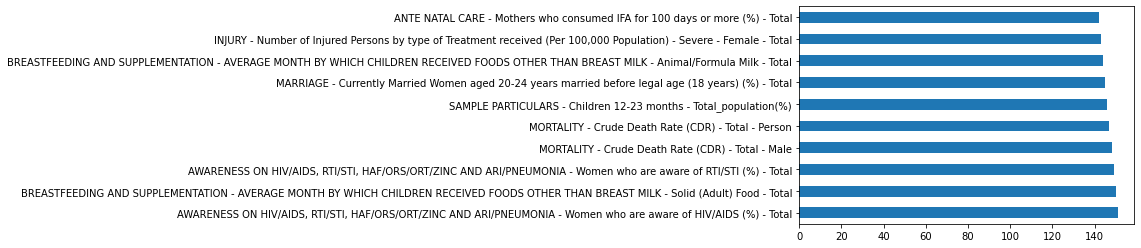

In [57]:
important_features_fisher[:10].plot(kind='barh')

In [58]:
selected_features

,corr
"CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Person - Total",1.000000
MARRIAGE - Mean age at Marriage# - Male - Total,0.651407
MARRIAGE - Mean age at Marriage# - Female - Total,0.606316
FERTILITY - Median age at first live birth of Women aged 15-49 years - Total,0.586444
FERTILITY - Median age at first live birth of Women aged 25-49 years - Total,0.565221
EFFECTIVE LITERACY RATE - Female - Total,0.563973
FERTILITY - Women with two children wanting no more children (%) - Total,0.541013
EFFECTIVE LITERACY RATE - Person - Total,0.537140
DELIVERY CARE - Caesarean out of total delivery taken place in Government Institutions (%) - Total,0.528628
FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEARS) - Current Usage - Withdrawal (%) - Total,0.504273


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['feature'] = new_df.columns
vif_df['vif'] = [variance_inflation_factor(new_df.values, i) for i in range(len(new_df.columns))]

In [60]:
vif_df.loc[vif_df['vif'] < 100]

,feature,vif
61,ABORTION - Pregnancy to Women aged 15-49 years...,44.244526
63,ABORTION - Women who went for Ultrasound befor...,51.452366
70,FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEAR...,82.766256
74,FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEAR...,22.239735
77,FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEAR...,50.892446
78,FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEAR...,22.907073
80,UNMET NEED FOR FAMILY PLANNING - Unmet need fo...,80.013762
99,DELIVERY CARE - Caesarean out of total deliver...,44.895883
100,DELIVERY CARE - Caesarean out of total deliver...,64.124057
101,POST NATAL CARE - Less than 24 hrs. stay in in...,90.877586


In [61]:
drop_features = vif_df.loc[vif_df['vif'] > 100]
drop_features_columns = drop_features.feature

In [62]:
temp_df = new_df.copy()

In [63]:
for column in drop_features_columns:
    temp_df.drop([column], axis=1, inplace=True)

In [64]:
temp_df.shape

(227, 14)

In [65]:
new_vif_df = pd.DataFrame()
new_vif_df['feature'] = temp_df.columns
new_vif_df['vif'] = [variance_inflation_factor(temp_df.values, i) for i in range(len(temp_df.columns))]

In [66]:
new_vif_df

,feature,vif
0,ABORTION - Pregnancy to Women aged 15-49 years...,6.557927
1,ABORTION - Women who went for Ultrasound befor...,5.701832
2,FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEAR...,1.464494
3,FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEAR...,2.134980
4,FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEAR...,3.217328
5,FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEAR...,2.905966
6,UNMET NEED FOR FAMILY PLANNING - Unmet need fo...,5.236588
7,DELIVERY CARE - Caesarean out of total deliver...,9.520129
8,DELIVERY CARE - Caesarean out of total deliver...,11.726929
9,POST NATAL CARE - Less than 24 hrs. stay in in...,6.554368


In [215]:
selected_features

,corr
"CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Person - Total",1.000000
MARRIAGE - Mean age at Marriage# - Male - Total,0.651407
MARRIAGE - Mean age at Marriage# - Female - Total,0.606316
FERTILITY - Median age at first live birth of Women aged 15-49 years - Total,0.586444
FERTILITY - Median age at first live birth of Women aged 25-49 years - Total,0.565221
EFFECTIVE LITERACY RATE - Female - Total,0.563973
FERTILITY - Women with two children wanting no more children (%) - Total,0.541013
EFFECTIVE LITERACY RATE - Person - Total,0.537140
DELIVERY CARE - Caesarean out of total delivery taken place in Government Institutions (%) - Total,0.528628
FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEARS) - Current Usage - Withdrawal (%) - Total,0.504273


In [74]:
import statsmodels.api as sm

x_data = sm.add_constant(df.drop(['State', 'State / District Name'], axis=1))
est = sm.OLS(y_diabetes, x_data)
est2 = est.fit()
print(est2.summary())

                                                                         OLS Regression Results                                                                        
Dep. Variable:     CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Person - Total   R-squared:                       0.935
Model:                                                                                                                     OLS   Adj. R-squared:                  0.804
Method:                                                                                                          Least Squares   F-statistic:                     7.142
Date:                                                                                                         Sun, 13 Dec 2020   Prob (F-statistic):           1.94e-17
Time:                                                                                                                 16:38:08   Log-Likelihood:                

In [29]:
from sklearn.feature_selection import f_regression

f, p_value = f_regression(df.drop(['State', 'State / District Name'], axis=1), y_diabetes)

In [30]:
p_value_features = pd.DataFrame(p_value, index=df.drop(['State', 'State / District Name'], axis=1).columns, columns=['p_values'])
selected_features_p_values = p_value_features.loc[p_value_features['p_values'] < 0.05]
selected_features_p_values

,p_values
SAMPLE PARTICULARS - Sample Units - Total,2.326207e-11
SAMPLE PARTICULARS - Households - Total,7.000047e-10
SAMPLE PARTICULARS - Population - Total,1.855012e-07
SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,6.692315e-09
SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,1.515384e-08
...,...
CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,8.060124e-14
CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,5.915623e-13
SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),7.980411e-04
SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),1.847351e-02


In [31]:
X = df[df.columns & selected_features_p_values.index]
y = y_diabetes

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = lin_reg.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

print("mse is {}".format(mean_squared_error(y_test, y_pred)))
print("rmse is {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("r2_score is {}".format(r2_score(y_test, y_pred)))


mse is 120143.73574811069
rmse is 346.61756410792384
r2_score is 0.0815663845162492


In [37]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
decision_pred = decision_tree.predict(x_test)

In [38]:
print("mse is {}".format(mean_squared_error(y_test, decision_pred)))
print("rmse is {}".format(np.sqrt(mean_squared_error(y_test, decision_pred))))
print("r2_score is {}".format(r2_score(y_test, decision_pred)))


mse is 109125.28476956519
rmse is 330.3411642068926
r2_score is 0.16579645865405246


In [39]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=700, random_state=42)
random_forest.fit(x_train, y_train)
forest_pred = random_forest.predict(x_test)

In [40]:
print("mse is {}".format(mean_squared_error(y_test, forest_pred)))
print("rmse is {}".format(np.sqrt(mean_squared_error(y_test, forest_pred))))
print("r2_score is {}".format(r2_score(y_test, forest_pred)))

mse is 33863.00321986562
rmse is 184.01902950473794
r2_score is 0.7411357297598584


In [41]:
from sklearn.linear_model import Lasso, ElasticNet
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 926807.1988758451, tolerance: 2433.696034067293
  model = cd_fast.enet_coordinate_descent(


In [42]:
print("mse is {}".format(mean_squared_error(y_test, lasso_pred)))
print("rmse is {}".format(np.sqrt(mean_squared_error(y_test, lasso_pred))))
print("r2_score is {}".format(r2_score(y_test, lasso_pred)))

mse is 105727.32578291297
rmse is 325.1573861730854
r2_score is 0.191772009838173


In [43]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.001)
enet.fit(x_train, y_train)
enet_pred = enet.predict(x_test)

In [44]:
print("mse is {}".format(mean_squared_error(y_test, enet_pred)))
print("rmse is {}".format(np.sqrt(mean_squared_error(y_test, enet_pred))))
print("r2_score is {}".format(r2_score(y_test, enet_pred)))

mse is 42132.951025345385
rmse is 205.26312631679707
r2_score is 0.6779164697996642


In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [200, 300, 500, 600, 700],
             'max_features' : ['auto', 'sqrt', 'log2'],
             'min_samples_split' : [2,5,10],
             'bootstrap' : [True, False]
             }

In [64]:
rf_random = GridSearchCV(estimator = random_forest, param_grid=param_grid, cv = 6, verbose=2, n_jobs=-1)

In [65]:
rf_random.fit(x_train, y_train)

Fitting 6 folds for each of 90 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.1min finished


GridSearchCV(cv=6,
             estimator=RandomForestRegressor(n_estimators=700, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 500, 600, 700]},
             verbose=2)

In [66]:
grid_predict = rf_random.predict(x_test)

In [67]:
print("mse is {}".format(mean_squared_error(y_test, grid_predict)))
print("rmse is {}".format(np.sqrt(mean_squared_error(y_test, grid_predict))))
print("r2_score is {}".format(r2_score(y_test, grid_predict)))

mse is 33910.26901937097
rmse is 184.1474111123232
r2_score is 0.7407744083904327


In [68]:
rf_random.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 600}

In [89]:
f_val, new_p_value = f_regression(X, y_diabetes)

In [92]:
p_value_features = pd.DataFrame(new_p_value, index=X.columns, columns=['p_values'])
selected_features_p_values_new = p_value_features.loc[p_value_features['p_values'] < 0.05]
selected_features_p_values_new

,p_values
SAMPLE PARTICULARS - Sample Units - Total,2.326207e-11
SAMPLE PARTICULARS - Households - Total,7.000047e-10
SAMPLE PARTICULARS - Population - Total,1.855012e-07
SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total,6.692315e-09
SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total,1.515384e-08
...,...
CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Lower Limit,8.060124e-14
CONFIDENCE INTERVAL (95%) FOR SOME IMPORTANT INDICATORS - Crude Birth Rate - Total - Upper Limit,5.915623e-13
SAMPLE PARTICULARS - Ever Married Women (aged 15-49 years) - Total_population(%),7.980411e-04
SAMPLE PARTICULARS - Currently Married Women (aged 15-49 years) - Total_population(%),1.847351e-02


In [168]:
from sklearn.decomposition import PCA

#pca = PCA(0.95)
pca = PCA(n_components=0.95)
principal_components = pca.fit(x_train)


In [169]:
pca.n_components_

34

In [170]:
train_set = pca.transform(x_train)
test_set = pca.transform(x_test)

In [171]:
random_forest_pca = RandomForestRegressor(n_estimators=70, random_state=42)
random_forest_pca.fit(train_set, y_train)
random_forest_pca_pred = random_forest_pca.predict(test_set)

In [172]:
print("mse is {}".format(mean_squared_error(y_test, random_forest_pca_pred)))
print("rmse is {}".format(np.sqrt(mean_squared_error(y_test, random_forest_pca_pred))))
print("r2_score is {}".format(r2_score(y_test, random_forest_pca_pred)))

mse is 44003.47585469917
rmse is 209.77005471396333
r2_score is 0.663617323271731


In [173]:
pca.explained_variance_ratio_.sum()

0.9513541463103412

In [120]:
param_grid_pca = {'n_estimators' : [300, 500, 600, 650, 700],
             'max_features' : ['auto', 'sqrt', 'log2'],
             'min_samples_split' : [2,3,5,10],
             'bootstrap' : [True, False]
             }

In [125]:
rf_random_pca = GridSearchCV(estimator = random_forest_pca, param_grid=param_grid_pca, cv = 7, verbose=2, n_jobs=-1)
rf_random_pca.fit(train_set, y_train)

Fitting 7 folds for each of 144 candidates, totalling 1008 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1008 out of 1008 | elapsed:  2.1min finished


GridSearchCV(cv=7,
             estimator=RandomForestRegressor(n_estimators=70, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [200, 250, 300, 500, 600, 700]},
             verbose=2)

In [126]:
random_forest_pca_pred = rf_random_pca.predict(test_set)

In [127]:
print("mse is {}".format(mean_squared_error(y_test, random_forest_pca_pred)))
print("rmse is {}".format(np.sqrt(mean_squared_error(y_test, random_forest_pca_pred))))
print("r2_score is {}".format(r2_score(y_test, random_forest_pca_pred)))

mse is 45399.256414789685
rmse is 213.07101261032597
r2_score is 0.6529473388714331


In [128]:
rf_random_pca.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 200}

In [119]:
rf_random_pca.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=6,
             estimator=RandomForestRegressor(n_estimators=70, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 500, 600, 700]},
             verbose=2)>